In [2]:
from PDEs import Grid, BoundaryCondition, diffusion_solver, construct_A_and_b
from matplotlib.animation import FuncAnimation 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from integrate import solve_to
from continuation import continuation
from IPython.display import HTML
from functions import*
from scipy.optimize import root
import os
from IPython.core.display import HTML
import socket
import threading
import http.server
import socketserver
%matplotlib inline

In [ ]:
""" INTEGRATING """

# week 14 content

In [ ]:
""" NUMERICAL CONTINUATION """

# Weeks 15, 17

""" equilibria for h(x,t,alpha) = x**3 - x + alpha """

y = np.linspace(-1.5,1.5,100)
plt.plot(y-y**3,y)

u = continuation(h,x0 = [1],par0 = [-2],
                   vary_par = 0,
                   step_size = 0.1,
                   max_steps = 50,
                   solve_for = 'equilibria',
                   method = 'nParam')
plt.plot(u[-1],u[0])


In [ ]:

""" Predator prey model equilibria """

u = continuation(PPM,x0 = [0.5,0.3],par0 = [0.5,0.2,0.1],
                   vary_par = 0,
                   step_size = 0.1,
                   max_steps = 50,
                   solve_for = 'equilibria',
                   method = 'pArclength')
plt.plot(u[-1],u[0])

(4, 21)

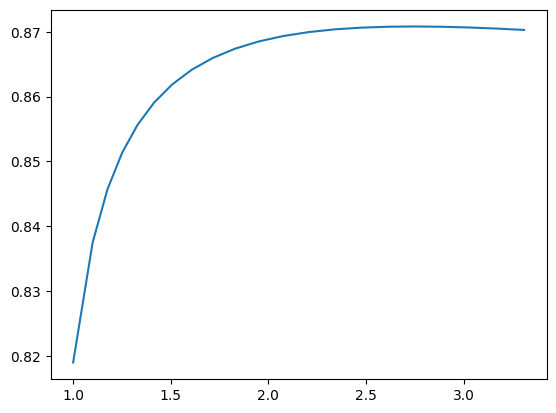

In [3]:

""" TEST FOR LIMIT CYCLES """

u = continuation(PPM,x0 = [0.5,0.5,20],par0 = [1,0.1,0.1],
                   vary_par = 0,
                   step_size = 0.1,
                   max_steps = 20,
                   solve_for = 'limit_cycle',
                   method = 'pArclength')
plt.plot(u[-1],u[0])

u.shape

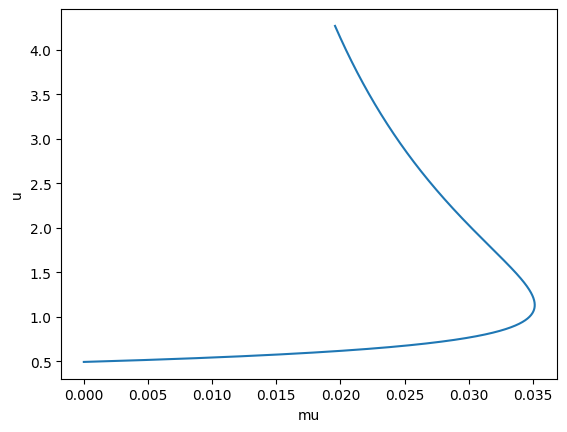

In [4]:
""" FINITE DIFFERENCE ODEs """

# week 19

""" VARY PARAMETERS IN BRATU PROBLEM """

%matplotlib inline
grid = Grid(N=100, a=0, b=10)
bc_left = BoundaryCondition('dirichlet', [lambda t: 5],grid);bc_right = BoundaryCondition('dirichlet',[lambda t: 10],grid)
A,b = construct_A_and_b(grid,bc_left,bc_right)
dx = grid.dx
u0 = np.zeros(len(grid.x[1:-1]))

u = continuation(bratu,  # the ODE to use
    x0 = u0,  # the initial state
    par0=[0,1,dx,A],  # the initial parameters
    vary_par=0,  # the index of the parameter to vary
    step_size=0.001,  # the size of the steps to take
    max_steps=1000,  # the number of steps to take
    solve_for = 'equilibria', # 'equilibria' or 'limit cycle'
    method = 'pArclength',
    solver=root)
plt.xlabel('mu')
plt.ylabel('u')
plt.plot(u[-1],u[0])


In [4]:
""" FINITE DIFFERENCE PDEs """

# Weeks 20,21,22

grid = Grid(N=10, a=0, b=1)
bc_left = BoundaryCondition('dirichlet', [lambda t: 0], grid)
bc_right = BoundaryCondition('dirichlet', [lambda t: 0], grid)
t_steps = 1000
x = grid.x

result = diffusion_solver(grid,
                    bc_left,
                    bc_right,
                    IC = 0,
                    D=0.1,
                    q=1,
                    dt=0.1,
                    t_steps=t_steps,
                    method='explicit-euler',
                    storage = 'sparse')

u = result.u
x = result.x
t_span = result.t

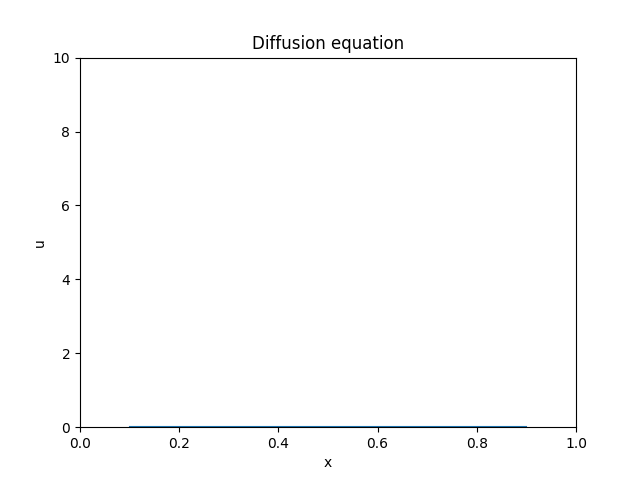

In [5]:
""" ANIMATING SOLUTION """

%matplotlib widget
fig,ax = plt.subplots()

line, = ax.plot(x,u[:,0])
ax.set_ylim(0,10)
ax.set_xlim(grid.left,grid.right)

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Diffusion equation')

def animate(i):
    line.set_data((x,u[:,i]))
    return line,

ani = FuncAnimation(fig, animate, frames=t_steps, interval=100, blit=True)
plt.show()

In [3]:

""" PLOT SOLUTION AS 3D SURFACE """

fig = go.Figure(data=[go.Surface(z=u, x=t_span, y=x)])

fig.update_layout(
    title='u(x,t)',
    autosize=False,
    scene=dict(
        xaxis=dict(range=[0, 5]),
        xaxis_title='t',
        yaxis_title='x',
        zaxis_title='u(x, t)'),
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
t_span